In [28]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [27]:
X = pd.read_csv('../../data/processed/normalized_features.csv')
standardScaler = StandardScaler()
X_scaled = standardScaler.fit_transform(X)
df = pd.read_csv('../../data/processed/player_metadata.csv')

In [29]:
def run_pca_gmm(
    X,
    n_pca_components=0.95,
    n_clusters=4,
    random_state=42
):
    if isinstance(X, pd.DataFrame):
        X_values = X.values
    else:
        X_values = np.asarray(X)
    
    pca = PCA(n_components=n_pca_components, random_state=random_state)
    X_pca = pca.fit_transform(X_values)
    
    print(f"PCA reduced dimensionality from {X_values.shape[1]} to {X_pca.shape[1]} components.")
    print(f"Explained variance ratio (per component): {np.round(pca.explained_variance_ratio_, 4)}")
    print(f"Cumulative explained variance: {pca.explained_variance_ratio_.cumsum()[-1]:.4f}")
    
    gmm = GaussianMixture(
        n_components=n_clusters,
        covariance_type="full",
        random_state=random_state
    )
    gmm.fit(X_pca)
    
    cluster_labels = gmm.predict(X_pca)
    print(f"GMM fitted with {n_clusters} clusters.")
    
    return pca, gmm, X_pca, cluster_labels

In [30]:
n_pca_components = 0.95
n_clusters = 5

pca, gmm, X_pca, cluster_labels = run_pca_gmm(
    X=X,
    n_pca_components=n_pca_components,
    n_clusters=n_clusters,
    random_state=42
)

PCA reduced dimensionality from 36 to 29 components.
Explained variance ratio (per component): [0.2016 0.1262 0.0643 0.0574 0.0457 0.0414 0.0375 0.0336 0.031  0.0281
 0.0261 0.023  0.0215 0.0191 0.019  0.0167 0.0158 0.0152 0.0144 0.014
 0.0135 0.0127 0.0122 0.0118 0.0111 0.0108 0.0104 0.0096 0.0095]
Cumulative explained variance: 0.9535
GMM fitted with 5 clusters.


In [31]:
df_with_clusters = df.copy()
df_with_clusters["cluster"] = cluster_labels

for i in range(X_pca.shape[1]):
    df_with_clusters[f"PC{i+1}"] = X_pca[:, i]

print(df_with_clusters.head())

              Name       Club  Nat  Height  Weight  Age   CA   PA  cluster  \
0       Harry Kane  FC Bayern  ENG     188      86   29  184  185        2   
1  Jude Bellingham  R. Madrid  ENG     186      75   20  177  188        0   
2   Joshua Kimmich  FC Bayern  GER     177      75   28  174  183        4   
3       Leroy Sané  FC Bayern  GER     183      80   27  169  172        4   
4   Nicolò Barella      Inter  ITA     172      68   26  161  169        0   

        PC1  ...      PC20      PC21      PC22      PC23      PC24      PC25  \
0  1.204661  ...  0.515901  0.593702  1.203750  0.419268 -0.317742 -0.410343   
1  0.381886  ...  0.214890  0.000127 -0.187523  0.821130  0.253077 -0.325201   
2  0.373720  ... -0.120581  0.706724  0.460981  0.574524 -0.494196 -0.190340   
3  4.256925  ... -0.063008 -0.189515 -0.299690  0.486081 -0.014638  0.488296   
4  0.299223  ...  0.807324 -0.449962  0.045739  0.504162  0.482583  0.153590   

       PC26      PC27      PC28      PC29  
0 -0.0

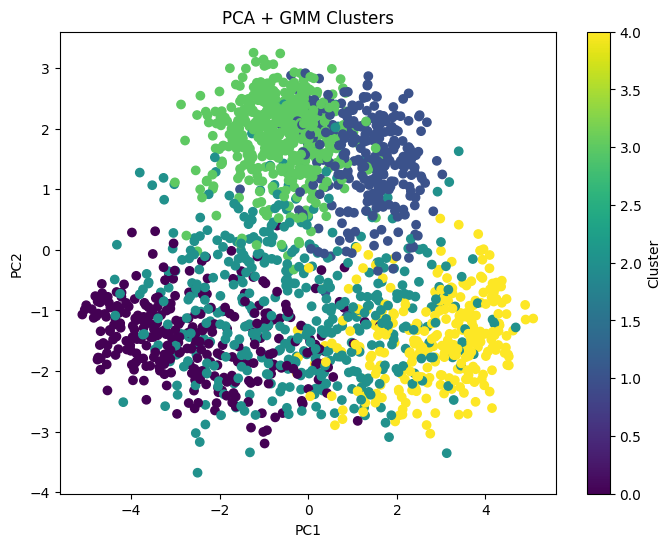

In [32]:
import matplotlib.pyplot as plt

if X_pca.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA + GMM Clusters")
    plt.colorbar(scatter, label="Cluster")
    plt.show()
